Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model. We will then handle imbalance in data using various techniques and improve f1-score

In [1]:
# Import essentila libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset

df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
228,4811-JBUVU,Male,0,No,No,30,Yes,Yes,Fiber optic,No,No,No,Yes,No,Yes,Month-to-month,Yes,Credit card (automatic),89.90,2723.15,No
5593,4508-OEBEY,Male,0,Yes,No,31,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),75.50,2424.45,No
6124,7153-CHRBV,Female,0,Yes,Yes,57,Yes,No,DSL,Yes,No,Yes,Yes,No,No,One year,Yes,Mailed check,59.30,3274.35,No
3893,5816-SCGFC,Female,1,No,No,7,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,51.30,419.35,No
127,6734-PSBAW,Male,0,Yes,No,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),23.55,1723.95,No


In [3]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [4]:
517400/df.shape[0]

73.46301292063042

In [5]:
# First of all, drop customerID column as it is of no use

df.drop('customerID',axis='columns',inplace=True)

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with this column

df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
# it is string. Lets convert it to numbers

pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df.shape

(7043, 20)

In [11]:
df.iloc[488].TotalCharges

' '

In [12]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [13]:
# Remove rows with space in TotalCharges

df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [16]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [17]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


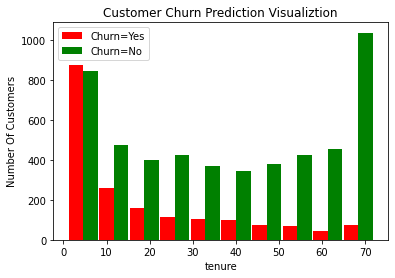

In [18]:
# Data Visualization

tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

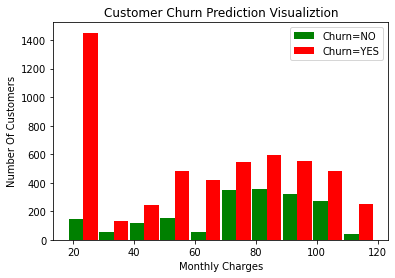

In [20]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=NO','Churn=YES'])
plt.legend()

In [21]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [22]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [23]:
# Some of the columns have no internet service or no phone service, that can be replaced with a simple No

df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [24]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [25]:
# Convert Yes and No to 1 or 0

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [26]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [27]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [28]:
df1.gender.unique()

array([1, 0])

In [29]:
# One hot encoding for categorical columns

df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [30]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1614,0,0,1,0,67,0,0,1,1,0,1,0,1,1,50.95,3521.70,0,1,0,0,0,0,1,1,0,0,0
1480,0,0,0,0,39,0,0,0,0,1,1,0,0,0,35.55,1309.15,0,1,0,0,0,1,0,0,0,0,1
3591,1,0,0,0,2,1,0,1,1,0,1,0,0,1,86.25,181.65,1,0,1,0,1,0,0,0,0,1,0
2045,1,0,0,0,69,1,1,0,1,1,1,1,1,1,110.50,7455.45,0,0,1,0,0,0,1,1,0,0,0
1846,0,0,0,0,19,1,0,0,0,0,0,0,0,0,18.80,279.20,0,0,0,1,0,1,0,0,0,0,1


In [31]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [32]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [33]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [34]:
# Train Test & split


X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [35]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [37]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [38]:
5163/1869

2.7624398073836276

In [39]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [40]:
X_train.shape

(5625, 26)

In [41]:
X_test.shape

(1407, 26)

In [42]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0.525871,0.006035,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,0,1,0,1,0.713930,0.174077,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,0,0,0,1,0.061692,0.163034,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,1,1,1,1,0.607960,0.661718,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,1,0,1,0,0.298507,0.021169,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,0,1,1,1,0.774627,0.501419,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,0,0,0,1,0.018905,0.000156,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,0,1,1,1,0.760697,0.218798,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,0,0,0,0,0.113433,0.008222,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,0,1,1,1,0.738806,0.398638,0,1,0,1,0,0,0,0,1,0


In [43]:
len(X_train.columns)

26

In [46]:
!pip install tensorflow-addons

     |████████████████████████████████| 686kB 12.2MB/s 


In [47]:
# Build a model (ANN) in tensorflow/keras

from tensorflow_addons import losses

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [48]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [49]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 861us/step - loss: 0.5441 - accuracy: 0.7408
Epoch 2/100
176/176 [==============================] - 0s 901us/step - loss: 0.4257 - accuracy: 0.7871
Epoch 3/100
176/176 [==============================] - 0s 851us/step - loss: 0.4293 - accuracy: 0.7890
Epoch 4/100
176/176 [==============================] - 0s 950us/step - loss: 0.4193 - accuracy: 0.7960
Epoch 5/100
176/176 [==============================] - 0s 965us/step - loss: 0.4109 - accuracy: 0.8053
Epoch 6/100
176/176 [==============================] - 0s 984us/step - loss: 0.4037 - accuracy: 0.8065
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4186 - accuracy: 0.7974
Epoch 8/100
176/176 [==============================] - 0s 933us/step - loss: 0.4082 - accuracy: 0.8060
Epoch 9/100
176/176 [==============================] - 0s 877us/step - loss: 0.4087 - accuracy: 0.8065
Epoch 10/100
176/176 [==============================] - 0s 853us/step - los

## Mitigating Skewdness of Data



Undersampling

In [50]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [51]:

# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
1    1869
0    1869
Name: Churn, dtype: int64


In [52]:
# Train Test & Split

X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [53]:
# Number of classes in training Data

y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [54]:
# Printing Classification in the last, Scroll down till the last epoch to watch the classification repor

y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 910us/step - loss: 0.6941 - accuracy: 0.5016
Epoch 2/100
94/94 [==============================] - 0s 838us/step - loss: 0.5359 - accuracy: 0.7591
Epoch 3/100
94/94 [==============================] - 0s 825us/step - loss: 0.4970 - accuracy: 0.7716
Epoch 4/100
94/94 [==============================] - 0s 896us/step - loss: 0.4800 - accuracy: 0.7764
Epoch 5/100
94/94 [==============================] - 0s 896us/step - loss: 0.4864 - accuracy: 0.7612
Epoch 6/100
94/94 [==============================] - 0s 845us/step - loss: 0.4785 - accuracy: 0.7737
Epoch 7/100
94/94 [==============================] - 0s 951us/step - loss: 0.4818 - accuracy: 0.7624
Epoch 8/100
94/94 [==============================] - 0s 920us/step - loss: 0.4803 - accuracy: 0.7664
Epoch 9/100
94/94 [==============================] - 0s 925us/step - loss: 0.4952 - accuracy: 0.7591
Epoch 10/100
94/94 [==============================] - 0s 837us/step - loss: 0.4720 - accura

Check classification report above. f1-score for minority class 1 improved from 0.57 to 0.75. Score for class 0 reduced to 0.73 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

Oversampling

In [56]:
# Oversample 1-class and concat the DataFrames of both classes

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
1    5163
0    5163
Name: Churn, dtype: int64


In [57]:
# Train Test Split

X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [58]:
# Number of classes in training Data

y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [59]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 809us/step - loss: 0.5952 - accuracy: 0.6873
Epoch 2/100
259/259 [==============================] - 0s 859us/step - loss: 0.4978 - accuracy: 0.7611
Epoch 3/100
259/259 [==============================] - 0s 901us/step - loss: 0.4830 - accuracy: 0.7678
Epoch 4/100
259/259 [==============================] - 0s 825us/step - loss: 0.4789 - accuracy: 0.7651
Epoch 5/100
259/259 [==============================] - 0s 865us/step - loss: 0.4699 - accuracy: 0.7728
Epoch 6/100
259/259 [==============================] - 0s 920us/step - loss: 0.4689 - accuracy: 0.7739
Epoch 7/100
259/259 [==============================] - 0s 903us/step - loss: 0.4667 - accuracy: 0.7726
Epoch 8/100
259/259 [==============================] - 0s 880us/step - loss: 0.4533 - accuracy: 0.7880
Epoch 9/100
259/259 [==============================] - 0s 884us/step - loss: 0.4591 - accuracy: 0.7771
Epoch 10/100
259/259 [==============================] - 0s 883us/step - l

Check classification report above. f1-score for minority class 1 improved from 0.57 to 0.79. Score for class 0 reduced to 0.77 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

SMOTE

In [66]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [68]:
!pip install imbalanced-learn

In [70]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [73]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [75]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 860us/step - loss: 0.6010 - accuracy: 0.6887
Epoch 2/100
259/259 [==============================] - 0s 870us/step - loss: 0.4787 - accuracy: 0.7725
Epoch 3/100
259/259 [==============================] - 0s 851us/step - loss: 0.4646 - accuracy: 0.7792
Epoch 4/100
259/259 [==============================] - 0s 907us/step - loss: 0.4637 - accuracy: 0.7773
Epoch 5/100
259/259 [==============================] - 0s 897us/step - loss: 0.4717 - accuracy: 0.7712
Epoch 6/100
259/259 [==============================] - 0s 855us/step - loss: 0.4579 - accuracy: 0.7836
Epoch 7/100
259/259 [==============================] - 0s 836us/step - loss: 0.4535 - accuracy: 0.7836
Epoch 8/100
259/259 [==============================] - 0s 937us/step - loss: 0.4538 - accuracy: 0.7894
Epoch 9/100
259/259 [==============================] - 0s 880us/step - loss: 0.4592 - accuracy: 0.7848
Epoch 10/100
259/259 [==============================] - 0s 836us/step - l

SMOT Oversampling increases f1 score of minority class 1 from 0.57 to 0.80 (huge improvement) Also over all accuracy improves from 0.78 to 0.79

Use of Ensemble with undersampling

In [76]:
df2.Churn.value_counts()


0    5163
1    1869
Name: Churn, dtype: int64

In [77]:
# Regain Original features and labels

X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [78]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [79]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [80]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [81]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0.525871,0.006035,0,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,0,1,0,1,0.713930,0.174077,0,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,0,0,0,1,0.061692,0.163034,0,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,1,1,1,1,0.607960,0.661718,1,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,1,0,1,0,0.298507,0.021169,1,0,0,1,0,0,0,0,0,1,0


In [82]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [83]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [84]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 831us/step - loss: 0.6504 - accuracy: 0.6211
Epoch 2/100
94/94 [==============================] - 0s 819us/step - loss: 0.5232 - accuracy: 0.7550
Epoch 3/100
94/94 [==============================] - 0s 835us/step - loss: 0.4948 - accuracy: 0.7725
Epoch 4/100
94/94 [==============================] - 0s 977us/step - loss: 0.4779 - accuracy: 0.7670
Epoch 5/100
94/94 [==============================] - 0s 867us/step - loss: 0.4715 - accuracy: 0.7819
Epoch 6/100
94/94 [==============================] - 0s 989us/step - loss: 0.4676 - accuracy: 0.7828
Epoch 7/100
94/94 [==============================] - 0s 890us/step - loss: 0.4923 - accuracy: 0.7667
Epoch 8/100
94/94 [==============================] - 0s 936us/step - loss: 0.4772 - accuracy: 0.7732
Epoch 9/100
94/94 [==============================] - 0s 879us/step - loss: 0.4762 - accuracy: 0.7676
Epoch 10/100
94/94 [==============================] - 0s 869us/step - loss: 0.4786 - accura

In [85]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 837us/step - loss: 0.6816 - accuracy: 0.5767
Epoch 2/100
94/94 [==============================] - 0s 857us/step - loss: 0.5298 - accuracy: 0.7466
Epoch 3/100
94/94 [==============================] - 0s 873us/step - loss: 0.4928 - accuracy: 0.7584
Epoch 4/100
94/94 [==============================] - 0s 922us/step - loss: 0.4809 - accuracy: 0.7765
Epoch 5/100
94/94 [==============================] - 0s 935us/step - loss: 0.4894 - accuracy: 0.7655
Epoch 6/100
94/94 [==============================] - 0s 893us/step - loss: 0.4657 - accuracy: 0.7782
Epoch 7/100
94/94 [==============================] - 0s 881us/step - loss: 0.4747 - accuracy: 0.7788
Epoch 8/100
94/94 [==============================] - 0s 960us/step - loss: 0.4904 - accuracy: 0.7578
Epoch 9/100
94/94 [==============================] - 0s 930us/step - loss: 0.4855 - accuracy: 0.7572
Epoch 10/100
94/94 [==============================] - 0s 899us/step - loss: 0.4906 - accura

In [86]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 0s 917us/step - loss: 0.6632 - accuracy: 0.6256
Epoch 2/100
83/83 [==============================] - 0s 873us/step - loss: 0.5501 - accuracy: 0.7484
Epoch 3/100
83/83 [==============================] - 0s 832us/step - loss: 0.4851 - accuracy: 0.7857
Epoch 4/100
83/83 [==============================] - 0s 837us/step - loss: 0.4648 - accuracy: 0.7857
Epoch 5/100
83/83 [==============================] - 0s 944us/step - loss: 0.4820 - accuracy: 0.7641
Epoch 6/100
83/83 [==============================] - 0s 841us/step - loss: 0.4719 - accuracy: 0.7843
Epoch 7/100
83/83 [==============================] - 0s 891us/step - loss: 0.4839 - accuracy: 0.7656
Epoch 8/100
83/83 [==============================] - 0s 909us/step - loss: 0.4694 - accuracy: 0.7769
Epoch 9/100
83/83 [==============================] - 0s 850us/step - loss: 0.4595 - accuracy: 0.7874
Epoch 10/100
83/83 [==============================] - 0s 825us/step - loss: 0.4512 - accura

In [87]:
len(y_pred1)

1407

In [88]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [89]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1033
           1       0.48      0.80      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.73      1407

